# Module 35 Topic Review: Clustering methods 

## Types of Clustering Strategies

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

np.random.seed(42)
%matplotlib inline 

In [2]:
X, y = make_blobs(n_samples=40,n_features=2,centers=6,cluster_std=0.8)

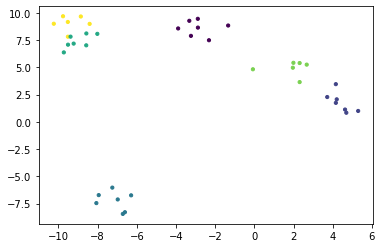

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

### non-hierarchical (e.g. K-Means)

In [4]:
k_means = KMeans(n_clusters=6)
k_means.fit(X)
predicted_clusters = k_means.predict(X)

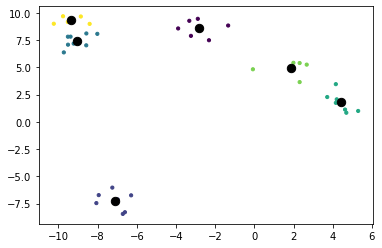

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10)
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70);

### Hierarchical agglomerative (HAC)

In [6]:
from sklearn.cluster import AgglomerativeClustering

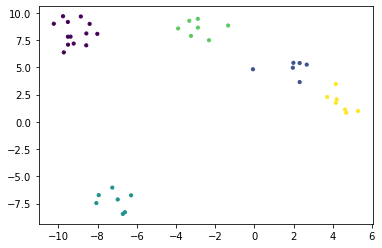

In [7]:
agg_clust = AgglomerativeClustering(n_clusters=5)
assigned_clust = agg_clust.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=assigned_clust, s=10);

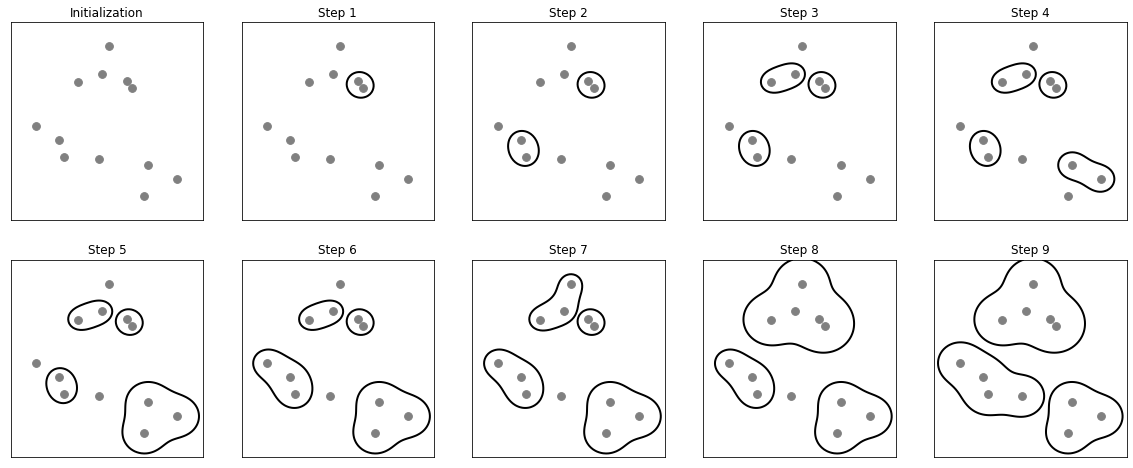

In [8]:
from mglearn import plot_agglomerative
plot_agglomerative.plot_agglomerative_algorithm()

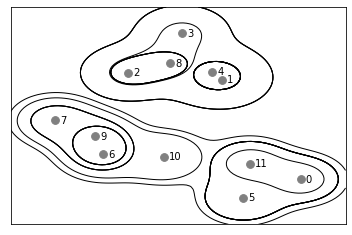

In [9]:
plot_agglomerative.plot_agglomerative()

## Likage Criteria

### Complete (a.k.a maximum linkage)
merges the two clusters that have the smallest maximum distance between their points.

### Average  
merges the two clusters that have the smallest average distance between all the points.

### Ward  
 picks the two clusters to merge in a way that the variance within all clusters increases the least. Generally, this leads to clusters that are fairly equally sized.

## Performance Metrics 

In [10]:
X_2, y_2 = make_blobs(n_samples=400,n_features=2,centers=np.random.randint(3,8),cluster_std=0.8)

In [11]:
k_means_3 = KMeans(n_clusters=3).fit(X_2)
k_means_4 = KMeans(n_clusters=4).fit(X_2)
k_means_5 = KMeans(n_clusters=5).fit(X_2)
k_means_6 = KMeans(n_clusters=6).fit(X_2)
k_means_7 = KMeans(n_clusters=7).fit(X_2)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

### Calinski-Harabaz Index (a.k.a. variance ratio)  
a variance ratio measurement which measures the ratio between within-cluster dispersion and between-cluster dispersion. You'll often hear this metric referred as "variance ratio".

This score is not bounded. The higher, the better.

In [12]:
from sklearn.metrics import calinski_harabasz_score

In [13]:
CH_score = []
for k in k_list:
    labels = k.labels_
    score = calinski_harabasz_score(X_2,labels)
    CH_score.append(score)
print(CH_score)

[2472.280135616044, 2915.3109142250687, 2453.224883910695, 2204.898914265814, 2054.7254746786243]


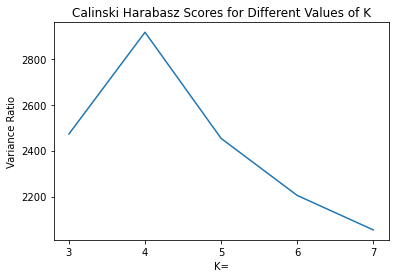

In [37]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

### Within cluster sum of squares (wcss)

In [15]:
wcss_score = []
for k in k_list:
    labels = k.labels_
    inertia = k.inertia_
    wcss_score.append(inertia)
print(wcss_score)

[908.8413482542444, 529.6913339579685, 473.1800350591216, 421.94230953935977, 377.7869939214996]


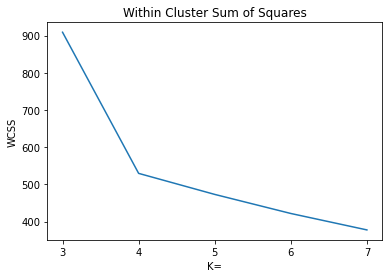

In [16]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

### Adjusted Rand Index  
computes a similarity measure between two different clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters predicted, and the true clusterings, before adjusting for random chance. Note that the true labels must be known for this metric to be used.

In [17]:
agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=6)
agg_avg = AgglomerativeClustering(linkage ='average', n_clusters=6)
agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=6)

as_comp = agg_comp.fit_predict(X)
as_avg = agg_avg.fit_predict(X)
as_ward = agg_ward.fit_predict(X)

In [18]:
labels_kmeans = k_means.labels_
labels_comp = agg_comp.labels_
labels_avg = agg_avg.labels_
labels_ward = agg_ward.labels_

In [19]:
from sklearn import metrics

In [20]:
metrics.adjusted_rand_score(labels_kmeans, y)  

0.9388043307704378

In [21]:
metrics.adjusted_rand_score(labels_ward, y)

0.8458985301090564

In [22]:
metrics.adjusted_rand_score(labels_avg, y)  

0.7871969908052382

In [23]:
metrics.adjusted_rand_score(labels_comp, y)  

0.9388043307704378

### Fowlkes Mallows Score  
measures the similarity for two clusters as a set of points by calculating the geometric mean between precision and recall. Note that the true labels must be known for this metric to be used.

This score is bounded between 0 and 1. Closer to 1 is better.

In [24]:
metrics.fowlkes_mallows_score(labels_kmeans, y) 

0.9478619236235273

In [25]:
metrics.fowlkes_mallows_score(labels_ward, y)

0.868421052631579

In [26]:
metrics.fowlkes_mallows_score(labels_avg, y)  

0.8307791692842624

In [27]:
metrics.fowlkes_mallows_score(labels_comp, y)  

0.9478619236235273

### Silhouette Score  
calculated using the mean intra-cluster distance, as well as the mean distance to the nearest cluster for each sample in the dataset. Note that the function below returns the mean Silhouette score for all samples, but you can also use it to get the Silhouette coefficient for a single point, in case you want to judge the fit of a single point in a cluster.

In [28]:
metrics.silhouette_score(X, labels_kmeans)

0.6465815734222577

In [29]:
metrics.silhouette_score(X, labels_ward) 

0.6276838181341133

In [30]:
metrics.silhouette_score(X,labels_avg) 

0.7052890298202132

In [31]:
metrics.silhouette_score(X, labels_comp) 

0.6465815734222577

## Visual Tools 

### elbow plots

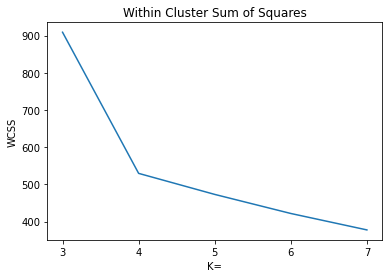

In [32]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

### Clustergrams  

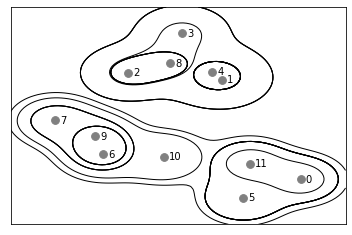

In [33]:
plot_agglomerative.plot_agglomerative()

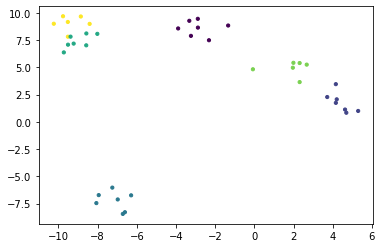

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

### Dendrograms

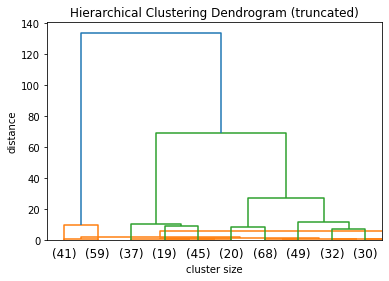

In [35]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X_2)

dendrogram(linkage_array)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(linkage_array,  truncate_mode='lastp', p=10)
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

## Pros/Cons

### K-Means  
The advantages of the k-means clustering approach are:
- Very easy to implement!  
- With many features, k-means is usually faster than HAC (as long as  is reasonably small)  
- Objects are locked into the cluster they are first assigned to and can change as the centroids move around  
- Clusters are often tighter than those formed by HAC  

However, this algorithm often comes with several disadvantages:

- Quality of results depends on picking the right value for $k$. This can be a problem when we don't know how many clusters to expect in our dataset  
- Scaling our dataset will completely change the results  
- Initial start points of each centroid have a very strong impact on our final results. A bad start point can cause sub-optimal clusters 

### HAC


HAC is useful as a clustering algorithm because:  
- It produces an ordered relationship between clusters, which can be useful when visualized  
- Smaller clusters are created. This allows us to get a very granular understanding of our dataset, and zoom in at the level where the clusters make the most sense to us  

However, this algorithm is also built on some assumptions which can be disadvantages:  
- Results are usually dependent upon the distance metric used  
- Objects can be grouped 'incorrectly' early on, with no way to relocate them. For instance, consider two points that belong to separate clusters, but are both nearer to each other than the center of the cluster they actually belong to (both are near the "boundary" between their cluster and the opposing cluster). These will be incorrectly grouped as a cluster, which will throw off the clustering of the groups they actually belong to, as well

## Use-Cases

### Semi-Supervised Learning

Train your model on your labeled training data. In the case of our example above, we would build the best model possible with our tiny dataset of 5,000 labeled examples.  

**Use your trained model to generate pseudo-labels for your unlabeled data.** This means having our trained model make predictions on our 95,000 unlabeled examples. Since our trained model does better than random chance, this means that our generated pseudo-labels will be at least somewhat more correct than random chance. We can even put a number to this, by looking at the performance our trained model had on the test set. For example, if our trained model had an accuracy of ~70%, then we can assume that ~70% of the pseudo-labels will be correct, ~30% will be incorrect.  

**Combine your labeled data and your pseudo-labeled data into a single, new dataset.** This means that we concatenate all our labeled data of 5,000 examples with the 95,000 pseudo-labeled examples.  

**Retrain your model on the new dataset.** Although some of the pseudo-labeled data will certainly be wrong, it's likely that the amount that is correct will be more useful, and the signal that these correctly pseudo-labeled examples provide will outweigh the incorrectly labeled ones, thereby resulting in better overall model performance.  

<img src='./images/semi-supervised.png' width=1000>

If semi-supervised learning sounds a bit risky to you, you're not wrong. When done correctly, semi-supervised learning can increase overall model performance by opening up access to much more data than we would have access to, and more data almost always results in better performance, but without the exorbitant costs of paying to have humans generate labels for the data needed.  

### Market Segmentation

Perhaps the most common use case for clustering algorithms in the real world, Market Segmentation refers to using Cluster Analysis to segment a customer base into different market segments using the clustering techniques we've learned.

<img src='./images/marketing-strategy.png' width=1000>

# Recap

- There are two main types of clustering algorithms: non-hierarchical clustering (e.g. k-means) and hierarchical agglomerative clustering (HAC)  

- You can quantify the performance of a clustering algorithm using metrics such as variance ratios and silhouette score  

- When working with the k-means clustering algorithm, it is useful to create elbow plots to find an optimal value for $k$

- When using hierarchical agglomerative clustering, different linkage criteria can be used to determine which clusters should be merged and at what point

- Dendrograms and clustergrams are very useful visual tools in hierarchical agglomerative clustering  

- Advantages of k-means clustering include easy implementation and speed, whereas the main disadvantage is that it isn't always straightforward how to pick the "right" value for  $k$ 

- Advantages of hierarchical agglomerative clustering include easy visualization and intuitiveness, whereas the main disadvantage is that the result is very distance-metric-dependent  

- You can use supervised and unsupervised learning together in a few different ways. Applications of this are look-alike models in market segmentation and semi-supervised learning  